# Análise de Cidadãos alistados no Serviço Militar em 2024

**Autor**: Wellington M Santos - Cientista de Dados <br>
**Contato**: [Linkedin](https://www.linkedin.com/in/wellington-moreira-santos/) | wsantos08@hotmail.com

 Dados de brasileiros que se alistaram no Serviço Militar com ano de nascimento, peso, altura, tamanho da cabeça, número do calçado, tamanho da cintura, município, UF e país de nascimento, estado civil, sexo, escolaridade, ano de alistamento, se foi dispensado ou não, zona residencial, município, uf e país de residência, junta, município e UF da junta.
Catalogação: 07/04/2025<br>
Data de atualização do arquivo: 03/04/2025


*Fonte*: https://dados.gov.br/dados/conjuntos-dados/servico-militar

## Dependências e Configurações

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# versões
print("\nVersões utilizadas: \n----------------")
print("Versão do Python: ", sys.version)
print("Versão do Pandas: ", pd.__version__)
print("Versão Numpy: ", np.__version__)
print("Versão do Seaborn: ", sns.__version__)
print()


Versões utilizadas: 
----------------
Versão do Python:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Versão do Pandas:  2.2.3
Versão Numpy:  1.26.4
Versão do Seaborn:  0.13.2



## Carga e Exploração do Dataset

In [6]:
try:
    df = pd.read_csv("./datasets/sermil2024.csv", encoding='utf-8', sep=',')
    print("Dados carregados!")
except FileNotFoundError:
    print("Erro: O arquivo não foi encontrado. Verifique o caminho do arquivo.")
except pd.errors.ParserError:
    print("Erro: O arquivo CSV pode estar corrompido ou ter um formato inválido.")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

Dados carregados!


In [7]:
# primeiros registros
df.head()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1998,70.0,169.0,55.0,40.0,82.0,CACERES,MT,BRASIL,Casado,...,3° Ano - Ensino Médio,2024,Com dispensa,Urbana,CACERES,MT,BRASIL,30/24 - CACERES,CACERES,MT
1,1998,72.0,180.0,57.0,38.0,87.0,CAMPO GRANDE,MS,BRASIL,Solteiro,...,3° Semestre - Ensino Superior,2024,Com dispensa,Urbana,CAMPO GRANDE,MS,BRASIL,30/26 - CAMPO GRANDE,CAMPO GRANDE,MS
2,1970,57.0,173.0,59.0,40.0,NaN,MACAPA,AP,BRASIL,Solteiro,...,Ensino Fundamental Completo,2024,Sem dispensa,Urbana,MACAPA,AP,BRASIL,28/45 - MACAPA,MACAPA,AP
3,2003,65.0,170.0,58.0,40.0,77.0,BARUERI,SP,BRASIL,Solteiro,...,2° Semestre - Ensino Superior,2024,Com dispensa,Urbana,BARUERI,SP,BRASIL,4/22 - BARUERI,BARUERI,SP
4,2000,76.0,171.0,55.0,42.0,76.0,RECIFE,PE,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Urbana,RECIFE,PE,BRASIL,21/1 - RECIFE (COMPAZ DOM HELDER CAMARA),RECIFE,PE


In [8]:
# ultimos registros
df.tail()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
885533,2006,NaN,NaN,NaN,NaN,NaN,FAZENDA RIO GRANDE,PR,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Urbana,FAZENDA RIO GRANDE,PR,BRASIL,15/326 - FAZENDA RIO GRANDE,FAZENDA RIO GRANDE,PR
885534,2006,NaN,NaN,NaN,NaN,NaN,SOROCABA,SP,BRASIL,Solteiro,...,3° Ano - Ensino Médio,2024,Com dispensa,Urbana,SOROCABA,SP,BRASIL,14/154 - SOROCABA,SOROCABA,SP
885535,2006,NaN,NaN,NaN,NaN,NaN,TAQUARITINGA DO NORTE,PE,BRASIL,Solteiro,...,Ensino Médio Completo,2024,Com dispensa,Rural,TAQUARITINGA DO NORTE,PE,BRASIL,21/99 - TAQUARITINGA DO NORTE,TAQUARITINGA DO NORTE,PE
885536,2006,NaN,NaN,NaN,NaN,NaN,SOROCABA,SP,BRASIL,Solteiro,...,2° Ano - Ensino Médio,2024,Com dispensa,Rural,IBIUNA,SP,BRASIL,14/59 - IBIUNA,IBIUNA,SP
885537,2006,NaN,NaN,NaN,NaN,NaN,EUCLIDES DA CUNHA,BA,BRASIL,Solteiro,...,2° Ano - Ensino Médio,2024,Com dispensa,Urbana,QUIJINGUE,BA,BRASIL,17/60 - QUIJINGUE,QUIJINGUE,BA


In [9]:
# dimensões
f"O dataset apresenta {df.shape[0]} Registros e {df.shape[1]} Colunas"

'O dataset apresenta 885538 Registros e 21 Colunas'

In [11]:
# tipo de dados
df.dtypes

ANO_NASCIMENTO        int64
PESO                float64
ALTURA              float64
CABECA              float64
CALCADO             float64
CINTURA             float64
MUN_NASCIMENTO       object
UF_NASCIMENTO        object
PAIS_NASCIMENTO      object
ESTADO_CIVIL         object
SEXO                 object
ESCOLARIDADE         object
VINCULACAO_ANO        int64
DISPENSA             object
ZONA_RESIDENCIAL     object
MUN_RESIDENCIA       object
UF_RESIDENCIA        object
PAIS_RESIDENCIA      object
JSM                  object
MUN_JSM              object
UF_JSM               object
dtype: object

In [10]:
# atributos
df.columns.tolist()

['ANO_NASCIMENTO',
 'PESO',
 'ALTURA',
 'CABECA',
 'CALCADO',
 'CINTURA',
 'MUN_NASCIMENTO',
 'UF_NASCIMENTO',
 'PAIS_NASCIMENTO',
 'ESTADO_CIVIL',
 'SEXO',
 'ESCOLARIDADE',
 'VINCULACAO_ANO',
 'DISPENSA',
 'ZONA_RESIDENCIAL',
 'MUN_RESIDENCIA',
 'UF_RESIDENCIA',
 'PAIS_RESIDENCIA',
 'JSM',
 'MUN_JSM',
 'UF_JSM']

**Contexto aos atributos**

Documentação do Recurso: Relação de Juntas de Serviço Militar (JSM)

| Coluna        | Tipo   | Descrição                                                                                                     |
| ------------- | ------ | ------------------------------------------------------------------------------------------------------------- |
| JSM           | texto  | Código que identifica a junta. Os dígitos antes da “/” informam a Circunscrição de Serviço Militar enquadrante |
| ENDERECO      | texto  | Endereço da JSM                                                                                               |
| BAIRRO        | texto  | Bairro da JSM                                                                                                 |
| CEP           | texto  | CEP da JSM                                                                                                    |
| TELEFONE      | texto  | Telefone de contato da JSM                                                                                    |
| MUNICIPIO_JSM | texto  | Município                                                                                                     |
| UF_JSM        | texto  | UF (KK - UF no exterior)                                                                                      |


In [12]:
# informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885538 entries, 0 to 885537
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANO_NASCIMENTO    885538 non-null  int64  
 1   PESO              344226 non-null  float64
 2   ALTURA            344185 non-null  float64
 3   CABECA            343999 non-null  float64
 4   CALCADO           343989 non-null  float64
 5   CINTURA           343986 non-null  float64
 6   MUN_NASCIMENTO    885538 non-null  object 
 7   UF_NASCIMENTO     885538 non-null  object 
 8   PAIS_NASCIMENTO   885538 non-null  object 
 9   ESTADO_CIVIL      885538 non-null  object 
 10  SEXO              885538 non-null  object 
 11  ESCOLARIDADE      885538 non-null  object 
 12  VINCULACAO_ANO    885538 non-null  int64  
 13  DISPENSA          885533 non-null  object 
 14  ZONA_RESIDENCIAL  885538 non-null  object 
 15  MUN_RESIDENCIA    885538 non-null  object 
 16  UF_RESIDENCIA     88

In [13]:
# analise estatistica descritiva
df.describe()

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,885538.000000,344226.000000,344185.000000,343999.000000,343989.000000,343986.000000,885538.0
mean,2005.913238,71.852890,173.025228,57.223562,41.316324,80.157201,2024.0
std,0.431645,15.183417,9.113056,2.746640,1.653535,12.118015,0.0
min,1970.000000,30.000000,130.000000,41.000000,30.000000,50.000000,2024.0
25%,2006.000000,61.000000,169.000000,56.000000,40.000000,73.000000,2024.0
50%,2006.000000,69.000000,174.000000,57.000000,41.000000,79.000000,2024.0
75%,2006.000000,79.000000,180.000000,59.000000,42.000000,88.000000,2024.0
max,2008.000000,200.000000,220.000000,79.000000,50.000000,180.000000,2024.0


In [22]:
# analisando ano de nascimento
## anos registrados
df['ANO_NASCIMENTO'].unique()

array([1998, 1970, 2003, 2000, 1997, 1999, 2002, 2001, 2005, 2006, 2004,
       2007, 1971, 2008, 1989, 1996])

<Axes: xlabel='ANO_NASCIMENTO', ylabel='Count'>

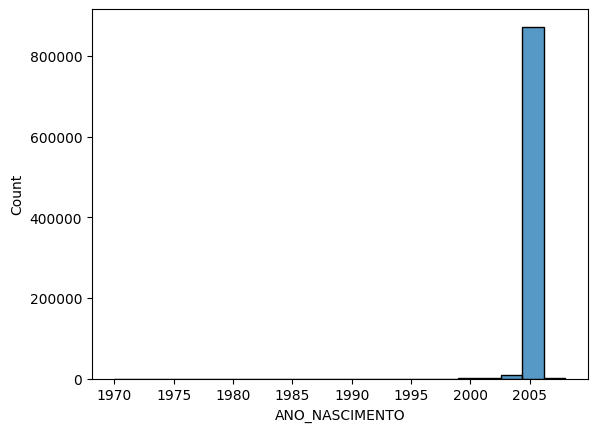

In [24]:
## distribuição
sns.histplot(x=df['ANO_NASCIMENTO'])